<h1> Processing and Visualisation of results </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [3]:
hto_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Bachelor-Thesis/demultiplex-pipeline/results/results.csv")

In [4]:
hto_results.columns = ["hashtag","classification"]

In [5]:
hto_results.head()

,hashtag,classification
0,AGGCCACAGCGTCTAT,Singlet
1,ATTGGTGAGTTCGCAT,Doublet
2,GTGCAGCTCAGTCCCT,Singlet
3,TAGTTGGGTCATACTG,Singlet
4,TTCTTAGAGAAGGCCT,Singlet


In [13]:
ids = hto_results['hashtag'].value_counts()
ids

AGGCCACAGCGTCTAT    1
TGGGCGTGTTATCCGA    1
ATTACTCGTCTTGATG    1
CAGCTAACACAGCGTC    1
GACGTGCGTTTCCACC    1
                   ..
CCTAGCTTCTGCTGCT    1
GTGTGCGGTTTGTTTC    1
CCTTACGCAACACGCC    1
CCGGTAGGTGCAGACA    1
AGCGTCGGTCCAGTAT    1
Name: hashtag, Length: 16916, dtype: int64

In [14]:
htoDemul = hto_results['classification'].value_counts()

In [15]:
htoDemul_dict = htoDemul.to_dict()


In [16]:
htoDemul_dict['Algorithm'] = "HTODemul"
htoDemul_dict

{'Singlet': 13900, 'Doublet': 2433, 'Negative': 583, 'Algorithm': 'HTODemul'}

In [17]:
multi_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Bachelor-Thesis/demultiplex-pipeline/results/multiseq-result.csv")

In [18]:
multi_results.columns = ["hashtag","classification"]

In [19]:
multi_results

,hashtag,classification
0,AGGCCACAGCGTCTAT,HTO-H
1,ATTGGTGAGTTCGCAT,Doublet
2,GTGCAGCTCAGTCCCT,HTO-H
3,TAGTTGGGTCATACTG,HTO-H
4,TTCTTAGAGAAGGCCT,HTO-D
...,...,...
16911,AGCGTCGAGTGGGATC,Doublet
16912,AACACGTGTAGCCTCG,Doublet
16913,AGCGTCGAGGGCTTCC,Doublet
16914,GTCGGGTAGCATGGCA,Doublet


In [20]:
multiseq = multi_results['classification'].value_counts()

In [21]:
multiseq

Doublet    5633
HTO-D      1703
HTO-B      1668
HTO-G      1572
HTO-H      1434
HTO-E      1268
HTO-C      1253
HTO-F      1235
HTO-A      1150
Name: classification, dtype: int64

In [22]:
ids_2 = multi_results['hashtag'].value_counts()
ids_2

AGGCCACAGCGTCTAT    1
TGGGCGTGTTATCCGA    1
ATTACTCGTCTTGATG    1
CAGCTAACACAGCGTC    1
GACGTGCGTTTCCACC    1
                   ..
CCTAGCTTCTGCTGCT    1
GTGTGCGGTTTGTTTC    1
CCTTACGCAACACGCC    1
CCGGTAGGTGCAGACA    1
AGCGTCGGTCCAGTAT    1
Name: hashtag, Length: 16916, dtype: int64

In [36]:
multiseq_res_dict = multiseq.to_dict()

In [37]:
multiseq_res_dict 

{'Doublet': 5633,
 'HTO-D': 1703,
 'HTO-B': 1668,
 'HTO-G': 1572,
 'HTO-H': 1434,
 'HTO-E': 1268,
 'HTO-C': 1253,
 'HTO-F': 1235,
 'HTO-A': 1150}

In [38]:
multi_singlets = np.sum(value for key, value in multiseq_res_dict.items() if key != 'Doublet')

/var/folders/10/sfmvfl9139b7z3wwbq1j88gr0000gn/T/ipykernel_6150/599037296.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  multi_singlets = np.sum(value for key, value in multiseq_res_dict.items() if key != 'Doublet')


In [39]:
multiseq_dict = dict()
multiseq_dict['Singlet'] = multi_singlets

In [40]:
multiseq_dict['Doublet'] = multiseq_res_dict['Doublet']

In [41]:
multiseq_dict['Negative'] = 0

In [42]:
multiseq_dict['Algorithm'] = "MULTI-Seq"

In [43]:
multiseq_dict

{'Singlet': 11283, 'Doublet': 5633, 'Negative': 0, 'Algorithm': 'MULTI-Seq'}

In [24]:
hashed_drops = pd.read_csv('/Users/mylenemarianagonzalesandre/Development/Bachelor-Thesis/demultiplex-pipeline/results/HD_results.csv')
hashed_drops=hashed_drops.rename(columns = {'Confident':'Singlet'})
hashed_drops.head()

,Unnamed: 0,Total,Best,Second,LogFC,LogFC2,Doublet,Singlet
0,AGGCCACAGCGTCTAT,4200,8,5,8.490503,0.580016,False,True
1,ATTGGTGAGTTCGCAT,3475,7,8,1.108589,4.124493,True,False
2,GTGCAGCTCAGTCCCT,1211,8,3,4.443640,1.908259,False,True
3,TAGTTGGGTCATACTG,955,8,4,4.728427,0.766317,False,True
4,TTCTTAGAGAAGGCCT,1912,4,2,5.561770,0.973143,False,True


In [25]:
#Confident = Singlet
#Doublet -> True
#Comparar las columnas buscando negativos para encontrar negativos
#simplemente resta el total entre estos 2 del total total y tienes los negativos
drops_count_singlets = hashed_drops['Singlet'].value_counts()
drops_count_doublets = hashed_drops['Doublet'].value_counts()

In [26]:
drops_count_singlets

True     14105
False     2811
Name: Singlet, dtype: int64

In [27]:
drops_count_doublets


False    14442
True      2474
Name: Doublet, dtype: int64

In [34]:
drops_count_singlets.to_dict()
drops_count_doublets.to_dict()
b= drops_count_singlets[True] + drops_count_singlets[False]
a = drops_count_singlets[True]+drops_count_doublets[True]
c = b - a
c
#Necesito crear un dict que contenga los 3, neg doub, sing

337

In [44]:
drop_dict = dict()
drop_dict['Singlet'] = drops_count_singlets[True]
drop_dict['Doublet'] = drops_count_doublets[True]
drop_dict['Negative'] = c
drop_dict['Algorithm'] = 'Hashed Drops'

In [45]:
dd = defaultdict(list)
for d in (htoDemul_dict, multiseq_dict,drop_dict): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print(dd)

defaultdict(<class 'list'>, {'Singlet': [13900, 11283, 14105], 'Doublet': [2433, 5633, 2474], 'Negative': [583, 0, 337], 'Algorithm': ['HTODemul', 'MULTI-Seq', 'Hashed Drops']})


In [46]:
dict(dd)

{'Singlet': [13900, 11283, 14105],
 'Doublet': [2433, 5633, 2474],
 'Negative': [583, 0, 337],
 'Algorithm': ['HTODemul', 'MULTI-Seq', 'Hashed Drops']}

In [47]:
bool(dict(dd))

True

In [48]:
dfObj = pd.DataFrame(dict(dd))

In [49]:
dfObj

,Singlet,Doublet,Negative,Algorithm
0,13900,2433,583,HTODemul
1,11283,5633,0,MULTI-Seq
2,14105,2474,337,Hashed Drops


<AxesSubplot:title={'center':'Hashing Demultiplexing per algorithm'}, xlabel='Algorithm'>

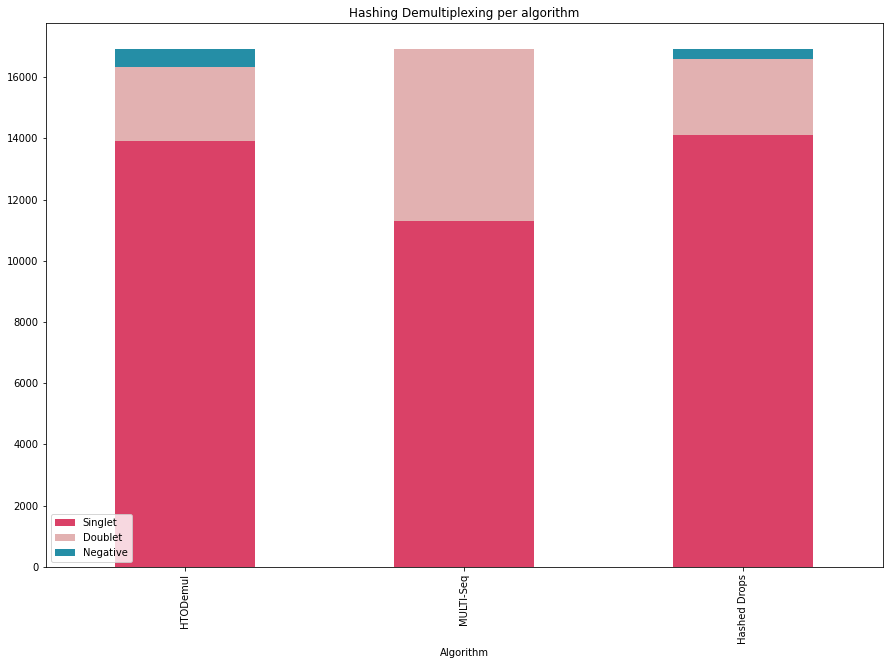

In [50]:
dfObj.plot.bar(x='Algorithm', stacked=True,color=["#DA4167","#E2B1B1","#258EA6"], title='Hashing Demultiplexing per algorithm',figsize=(15, 10))
